# Travail pratique 4
*INF600F - Traitement d'images (H2022, UQÀM)*


## Identification

- Nom : Jacob-Simard
- Prénom : Raphaël
- Code permanent : JACR26038907
- Cours : INF600f - H2022
- Équipe : 9

In [145]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology
from skimage import filters



im1 = imageio.imread("./tp4_ex1.png")
im2 = imageio.imread("./tp4_ex2.tif")

# Importation des modules pertinents ici.
# Assurez-vous d'inclure toute autre fonction que vous
# jugez nécessaires ici






# Exercice 1 : Reconnaissance de texte

In [146]:

def _pretraitement(img: np.ndarray) -> np.ndarray:
    """
    Effectue le prétraitement d'une image. 
    
    Retourne une copie de l'image donnée dont l'intensité à été inversée, les valeur on été transformées en tons de gris et normalisées entre 0 et 1.
    @param
        img : L'image à traiter
    @return
        L'image transformée en grayscale, normalisée et inversée
    """
    img_traite = img.copy()
    if len(img_traite.shape) > 2 :
        # Transformation en grayscale si l'image ne l'est pas déjà
        img_traite = img_traite.mean(axis=2).astype(np.float32)
    # Normalisation de l'image entre 0 et 1
    img_traite = (img_traite - img_traite.min()) / (img_traite.max() - img_traite.min())
    
    # Inversion des intensités
    img_traite = -img_traite + 1.0

    return img_traite

def _trouver_lettres_bordure(img:np.ndarray, seed:np.ndarray) -> np.ndarray:
    prev = None
    curr = seed
    while np.not_equal(prev, curr).any():
        prev = curr.copy()
        curr = np.logical_and(img, morphology.binary_dilation(curr))

    return curr

def _segmentation(img:np.ndarray) -> np.ndarray:
    traite = _pretraitement(img)
    seg = morphology.closing(traite)



    otsu = filters.threshold_otsu(seg)
    seg[ seg <= otsu]  = 0.0
    seg[seg > otsu] = 1.0

    bordure = seg.copy()
    bordure[1:-1, 1:-1] = 0.0
    lettres = _trouver_lettres_bordure(seg, bordure)

    seg = seg - lettres

    return seg

def display_randomImages(coll_img : list[np.ndarray]):
    return

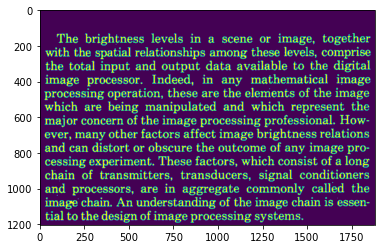

In [147]:
seg = _segmentation(im1)

plt.imshow(seg)



# Exercice 2 : Compter des cellules

In [148]:
# Ajouter ici des cellules de code / markdown pour vos réponses